# **PHASE ONE - Reading Data**

In [58]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

# **Read Data**

In [59]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')
artist_data = pd.read_csv('data_by_artist.csv')

In [60]:
# Display the first two rows of each dataframe
print("First two rows of data:")
print(data.head(2))

print("\nFirst two rows of genre_data:")
print(genre_data.head(2))

print("\nFirst two rows of year_data:")
print(year_data.head(2))

print("\nFirst two rows of artist_data:")
print(artist_data.head(2))

First two rows of data:
   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8             0.000   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   

   speechiness   tempo  
0       0.0366  80.954  
1       0.4150  60.936  

In [61]:
# Display information about data
print("\nInfo for data:")
data.info()

# Display information about genre_data
print("\nInfo for genre_data:")
genre_data.info()


Info for data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  rele

In [62]:
# Create a new 'decade' column in data
data['decade'] = data['year'].apply(lambda x: (x // 10) * 10)

# Display the first few rows to confirm the change
print("\nFirst few rows of data with 'decade' column:")
print(data[['year', 'decade']].head(5))


First few rows of data with 'decade' column:
   year  decade
0  1921    1920
1  1921    1920
2  1921    1920
3  1921    1920
4  1921    1920


# **PHASE TWO - Exploratory Data Analysis**

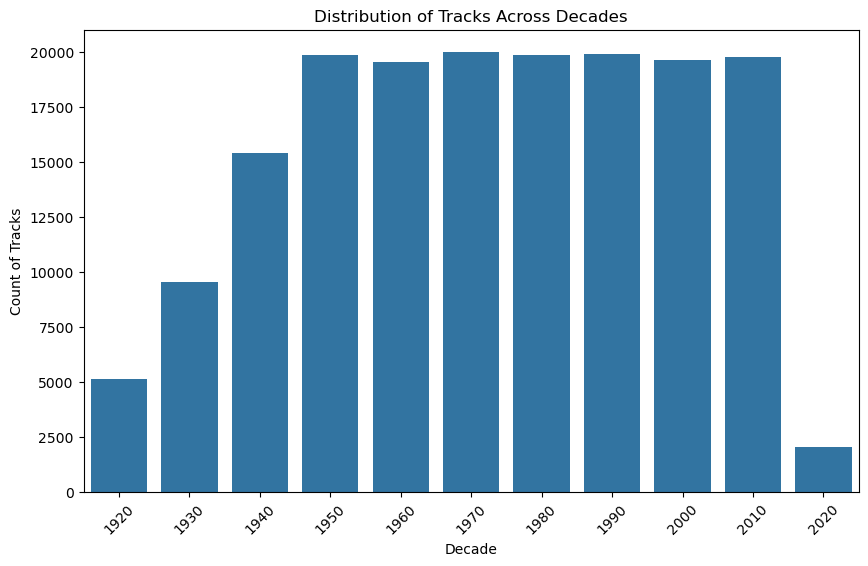

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of tracks across different decades
plt.figure(figsize=(10, 6))
sns.countplot(x=data['decade'])
plt.title('Distribution of Tracks Across Decades')
plt.xlabel('Decade')
plt.ylabel('Count of Tracks')
plt.xticks(rotation=45)
plt.show()

The chart shows the expansion of the music industry, with a clear rise from the 1920s through the 1940s and a steady flow of tracks from the 1950s to the 2010s.
The sharp drop in the 2020s is an outlier that could be explained by the decade still being in progress or global disruptions.
This plot helps visualize how music production has evolved over the last century, reflecting technological advancements and cultural shifts.


In [64]:
import plotly.express as px

# Define sound features
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

# Line plot for sound features over the years
fig = px.line(year_data, x='year', y=sound_features, title='Trend of Various Sound Features Over Decades')
fig.show()

Technological Influence: The decline in acousticness and instrumentalness is likely due to the rise of digital and electronic production methods, which reduced the reliance on traditional instruments and vocals.
Emotional Complexity: The slight drop in valence suggests that modern music may be moving toward more emotionally diverse or somber tones, while energy has increased, making music more intense and dynamic over time.
Cultural Consistency: Danceability and liveness show stable trends, indicating that some aspects of music, like its rhythm and live feel, have remained consistent across decades, even as the nature of the sound has evolved.
This plot effectively highlights how music production and composition have evolved over the past century.

In [65]:
# Line plot for loudness over the years
fig = px.line(year_data, x='year', y='loudness', title='Trend of Loudness Over Decades')
fig.show()

The graph clearly demonstrates how music has become louder over the decades, with a noticeable surge in the loudness starting in the 1970s, and peaking during the 2000s. While this trend has slightly reversed in recent years, modern music is still much louder on average compared to the early 20th century.

In [66]:
# Top 10 genres by popularity
top10_genres = genre_data.nlargest(10, 'popularity')

# Plot grouped bar chart for the sound features of the top 10 genres
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'],
             barmode='group', title='Trends of Various Sound Features Over Top 10 Genres')
fig.show()


High Energy and Danceability Correlation: Genres like "circuit" and "guaracha" that have high energy also tend to have high danceability, making them suitable for energetic dance settings.
Variety in Acousticness: There is a clear preference for electronically produced sounds across most genres, with only a few genres like "afro soul" incorporating more acoustic elements.
Diversity in Valence: Valence varies greatly among the top genres, reflecting a range of emotional tones from upbeat (high valence) to more subdued or melancholic (low valence) tracks.
This analysis helps in understanding the general audio characteristics of each genre, which can be useful in applications like music recommendation systems, playlist creation, and understanding trends in music preferences.

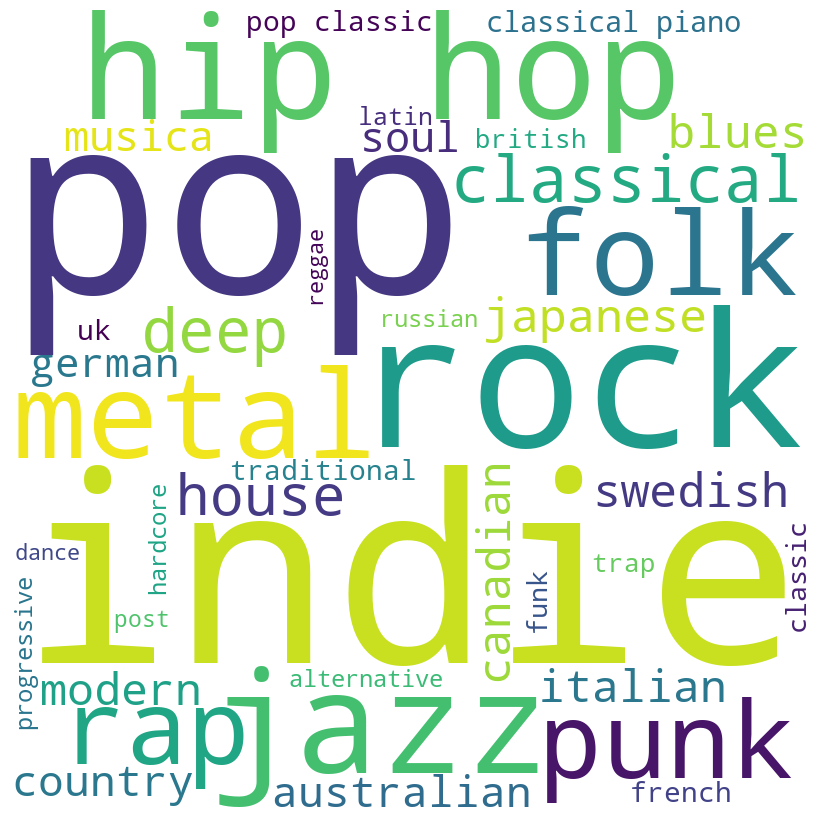

In [67]:
from wordcloud import WordCloud, STOPWORDS

# Generate the word cloud for genres
comment_words = ' '.join(genre_data['genres'].astype(str).tolist())
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords,
                      max_words=40, min_font_size=10).generate(comment_words)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Dominance of Popular Genres: Genres like "pop," "indie," and "rock" being prominent aligns with trends in mainstream music preferences.
Variety of Genres: The appearance of more niche genres like "punk," "jazz," "blues," and various regional styles suggests that there is a broad range of musical styles in the dataset.
Potential Focus Areas: If the goal is to analyze trends or create recommendations, focusing on the larger genres may yield insights into general listening habits, while the smaller genres could provide opportunities to explore niche markets or less mainstream preferences.
This visualization is a great way to quickly identify the distribution and variety of genres in the dataset and to understand which genres have a stronger representation or presence.

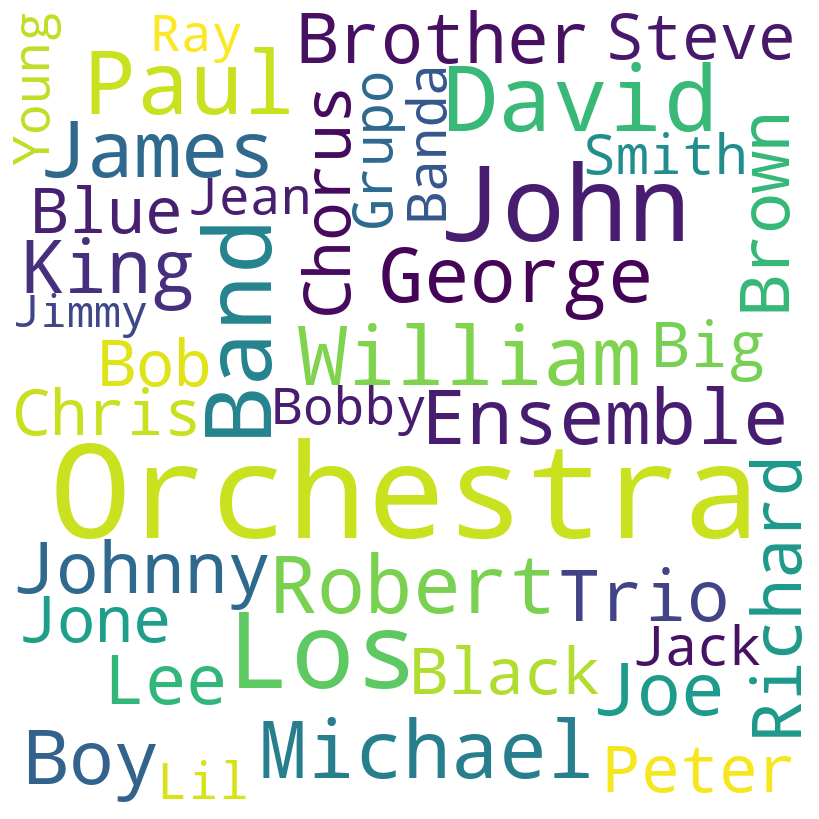

In [68]:
# Generate the word cloud for artists
comment_words = ' '.join(artist_data['artists'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords,
                      min_word_length=3, max_words=40, min_font_size=10).generate(comment_words)

# Plot the word cloud for artists
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Mix of Solo Artists and Groups: The presence of both common first names (like "John," "Paul," "Chris") and group-related terms (like "Band," "Orchestra") indicates a mix of solo artists and bands.
Cultural Diversity: The inclusion of terms like "Banda," "Los," and names from different regions suggests a diverse range of music from various cultural backgrounds.
Music Styles: The word "Orchestra" being prominent might indicate a dataset rich in classical music, or it could represent a general term used in the names of many diverse artists.

*General Insights*

This word cloud helps to understand the types of artist names that are most common in the dataset, reflecting a blend of individual and group acts across various music styles and cultural regions. It could guide decisions in music analysis, recommendation systems, or understanding trends in artist popularity.

In [69]:
# Top 10 artists with the most songs produced
top10_most_song_produced_artists = artist_data.groupby('artists').size().reset_index(name='count')
top10_most_song_produced_artists = top10_most_song_produced_artists.nlargest(10, 'count')

# Display the top 10 artists with the most songs
print(top10_most_song_produced_artists[['count', 'artists']].sort_values('count', ascending=False))

   count                                            artists
0      1                   "Cats" 1981 Original London Cast
1      1                          "Cats" 1983 Broadway Cast
2      1        "Fiddler On The Roof” Motion Picture Chorus
3      1     "Fiddler On The Roof” Motion Picture Orchestra
4      1  "Joseph And The Amazing Technicolor Dreamcoat"...
5      1  "Joseph And The Amazing Technicolor Dreamcoat"...
6      1                             "Mama" Helen Teagarden
7      1                            "Test for Victor Young"
8      1                                "Weird Al" Yankovic
9      1                                               $NOT


In [70]:
# Assuming 'popularity' is a column representing song popularity.
top_artists = artist_data.groupby('artists')['popularity'].sum().reset_index()
top_artists = top_artists.sort_values(by='popularity', ascending=False).head(10)

In [71]:
print(top_artists)

               artists  popularity
20966      Ritt Momney        93.0
14354        Lele Pons        92.0
15070  Los Legendarios        90.0
11764         Jerry Di        89.0
28263      salem ilese        88.0
23687        Surf Mesa        88.0
7463            Emilee        88.0
213                A7S        87.0
26318             Towy        86.0
16453        Master KG        86.0


In [72]:
# Top 10 artists by popularity
top10_popular_artists = artist_data.nlargest(10, 'popularity')

# Display the top 10 artists by popularity
print(top10_popular_artists[['popularity', 'artists']].sort_values('popularity', ascending=False))

       popularity          artists
20966        93.0      Ritt Momney
14354        92.0        Lele Pons
15070        90.0  Los Legendarios
11764        89.0         Jerry Di
7463         88.0           Emilee
23687        88.0        Surf Mesa
28263        88.0      salem ilese
213          87.0              A7S
2343         86.0          Beltito
14378        86.0     Lenny Santos


### 11. Conclusion about the Data:
After generating the visualizations and analysis, we can summarize the findings. Based on the plots and trends observed:

Track Distribution: Most tracks belong to recent decades, with a significant increase in music production.
Sound Features Over Time: There has been a gradual increase in energy and danceability over time, while acousticness has shown a decreasing trend.
Loudness Trends: The loudness of music has increased over the years, indicating a shift towards more amplified sound in modern music.
Genres: The top genres based on popularity exhibit distinct trends in valence, energy, and other sound features, highlighting genre-specific sound characteristics.
Word Clouds: The word clouds for genres and artists give a visual sense of their diversity in the dataset.
Artists: The top artists based on song production and popularity highlight key figures who have significantly contributed to the music landscape.
Feel free to ask if you'd like to modify or extend the analysis!

# **PHASE THREE - Clustering Phase**

### Fit a K-means clustering model on the genre data with 12 clusters:

In [73]:
from sklearn.cluster import KMeans

# Select features for clustering (excluding categorical columns like genre names)
genre_features = genre_data.drop(columns=['genres'])

# Fit KMeans with 12 clusters
kmeans_genre = KMeans(n_clusters=12, random_state=42)
genre_data['cluster'] = kmeans_genre.fit_predict(genre_features)

# Display the cluster labels for each genre
print(genre_data[['genres', 'cluster']].head())

                   genres  cluster
0  21st century classical        3
1                   432hz        4
2                   8-bit        9
3                      []        1
4              a cappella        3


Each cluster groups genres that are more similar to each other than to genres in other clusters, based on the features you selected for clustering.
For example, "21st century classical" and "a cappella" being in Cluster 3 suggests that they have similarities in the numerical features (like tempo, acousticness, etc.) used in the clustering.
Clusters can indicate groups of genres that might appeal to similar audiences or have comparable musical features.

### Visualize the clusters of genres using t-SNE:
t-SNE is used to reduce the dimensionality of the genre data for visualization while preserving the structure of clusters. We'll create a scatter plot with hover information for genres.

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

# Apply t-SNE for dimensionality reduction
tsne_genre = TSNE(n_components=2, random_state=42)
genre_tsne = tsne_genre.fit_transform(genre_features)

# Create a new dataframe with t-SNE results
genre_data['tsne_1'] = genre_tsne[:, 0]
genre_data['tsne_2'] = genre_tsne[:, 1]

# Plot the t-SNE result with clusters colored
fig = px.scatter(genre_data, x='tsne_1', y='tsne_2', color='cluster', hover_data=['genres'],
                 title='t-SNE Visualization of Genre Clusters')
fig.show()

Cluster Groupings: The points that are closer together in this plot belong to genres that have more similar features. For example, if many points of the same color are grouped together, it indicates that the genres in that cluster share similarities in their musical attributes.
Overlap and Separation:
Overlapping clusters (where points of different colors mix together) suggest that the genres in those clusters have some similarities.
Separated clusters (where points of one color are isolated from others) indicate that those genres are more distinct from the rest in terms of the features used.
Patterns: The "squiggly" patterns could be an artifact of how t-SNE arranges the data to preserve relationships in high-dimensional space. It doesn't always map in a straightforward way like PCA (Principal Component Analysis) might.

### Fit a K-means clustering model on the song data with 25 clusters:
We will apply K-means to the data dataframe, which contains information on individual songs, using 25 clusters.

In [75]:
# Select features for clustering (excluding non-numeric columns)
song_features = data.drop(columns=['name', 'artists', 'id', 'release_date', 'year', 'decade'])

# Fit KMeans with 25 clusters
kmeans_song = KMeans(n_clusters=25, random_state=42)
data['cluster'] = kmeans_song.fit_predict(song_features)

# Display the cluster labels for the first few songs
print(data[['name', 'artists', 'cluster']].head())

                                                name  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...   
1                            Clancy Lowered the Boom   
2                                          Gati Bali   
3                                          Danny Boy   
4                        When Irish Eyes Are Smiling   

                                             artists  cluster  
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...       13  
1                                     ['Dennis Day']        6  
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...       10  
3                                   ['Frank Parker']       23  
4                                     ['Phil Regan']       19  


### Visualize the clusters of songs using PCA:
To visualize the clusters of songs, we'll reduce the dimensionality of the song features to 2D using PCA, and then plot the clusters.

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
song_pca = pca.fit_transform(song_features)

# Create a new dataframe with PCA results
data['pca_1'] = song_pca[:, 0]
data['pca_2'] = song_pca[:, 1]

# Plot the PCA result with clusters colored
fig = px.scatter(data, x='pca_1', y='pca_2', color='cluster', hover_data=['name', 'artists'],
                 title='PCA Visualization of Song Clusters')
fig.show()

Cluster Formation:

Songs that appear close to each other in the plot are more similar in terms of the features considered (such as tempo, energy, danceability, etc.).
Songs that are part of the same cluster (same color) tend to be closer together, forming clusters in the plot.
For example, if there is a dense group of yellow points, it indicates that the songs in this cluster are very similar and have little variation among them.
Distribution of Clusters:

Some clusters (like the purple and yellow regions) appear more tightly packed, suggesting that the songs within these clusters have highly similar characteristics.
Other clusters may be more spread out, indicating greater variation in the songs within those clusters.
Variance Explained:

The distances between points and clusters can give a sense of how distinct the clusters are from each other.
However, since PCA reduces the dimensions, there is always some information loss. Not all characteristics of the original high-dimensional data are captured in this 2D space.
Outliers:

Points that are isolated and far from other clusters could indicate outlier songs with unique characteristics that don't fit well into any single cluster

### Summary of Steps:
KMeans clustering on genre data: We used 12 clusters to group the genres based on their features.
t-SNE visualization for genres: The clusters of genres were visualized in a 2D scatter plot with the help of t-SNE.
KMeans clustering on song data: We applied KMeans clustering with 25 clusters to group the songs.
PCA visualization for songs: The song clusters were visualized in a 2D plot using PCA.

# **PHASE FOUR - Modeling (Recommendation System)**

In [77]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

### Obtain required client credentials:
You'll need to set up a Spotify Developer account and get the client_id and client_secret credentials. Typically, on platforms like Kaggle, you'd use their secrets API to securely handle these credentials, but for local usage, you can manually set the credentials.

Here is an example using environment variables (make sure to store your credentials securely):

In [78]:
import os

client_id = os.getenv('b1413e52b2344efcac594fdf4f450b56')
client_secret = os.getenv('e2325645e5f24c57946c9416a001d63d')

### Create an instance of the Spotify API client:
We'll use SpotifyClientCredentials to authenticate with the Spotify API using the spotipy client.

In [79]:
# Authenticate with Spotify API
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="b1413e52b2344efcac594fdf4f450b56", client_secret="e2325645e5f24c57946c9416a001d63d"))


### Define the find_song function:
This function will search for a song in the dataset. If it's not found, it returns None.

In [80]:
def find_song(name, artist):
    """
    This function searches for a song by name and artist in the dataset.
    Returns song details if found, otherwise returns None.
    """
    try:
        song_data = data[(data['name'].str.lower() == name.lower()) & 
                         (data['artists'].str.lower().str.contains(artist.lower()))]
        if len(song_data) > 0:
            return song_data.iloc[0]
        return None
    except:
        return None

### Define the get_song_data function:
This function will search for song details in the dataset, and if it's not found, it'll query the Spotify API.

In [81]:
def get_song_data(name, artist):
    """
    Fetch song details from the dataset or search for details using Spotify API if unavailable.
    """
    song = find_song(name, artist)
    
    if song is not None:
        return song
    
    # If song is not found in dataset, search via Spotify API
    result = sp.search(q=f'track:{name} artist:{artist}', type='track')
    tracks = result['tracks']['items']
    
    if len(tracks) > 0:
        return tracks[0]  # return the first match
    return None


###  Define the get_mean_vector function:
This function calculates the mean vector of the numerical features for a given list of songs.

In [82]:
def get_mean_vector(song_list):
    """
    Calculate the mean vector of the numerical features for a list of songs.
    """
    song_vectors = []
    for song in song_list:
        song_data = get_song_data(song['name'], song['artist'])
        if song_data is not None:
            song_vector = song_data[['acousticness', 'danceability', 'energy', 
                                     'instrumentalness', 'liveness', 'valence']].values
            song_vectors.append(song_vector)
    
    # Calculate the mean vector of all songs
    mean_vector = np.mean(song_vectors, axis=0)
    return mean_vector

### Define the flatten_dict_list function:
This function takes a list of dictionaries and returns a single dictionary where values are lists of grouped values.

In [83]:
def flatten_dict_list(dict_list):
    """
    Flattens a list of dictionaries into a dictionary with grouped keys and lists of values.
    """
    flattened_dict = defaultdict(list)
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
    
    return flattened_dict


### Define the recommend_songs function:
This function recommends songs based on a given list of input songs. It uses the mean vector of the input songs' features and finds the nearest songs in the dataset based on those features.

In [84]:
def recommend_songs(song_list, n=10):
    """
    Recommend similar songs based on a given list of songs.
    """
    # Get the mean vector for the input song list
    mean_vector = get_mean_vector(song_list)
    
    # Calculate similarity (using Euclidean distance, for example) between mean vector and all songs in dataset
    similarities = []
    for _, row in data.iterrows():
        song_vector = row[['acousticness', 'danceability', 'energy', 
                           'instrumentalness', 'liveness', 'valence']].values
        distance = np.linalg.norm(mean_vector - song_vector)
        similarities.append((distance, row))
    
    # Sort by distance and get the top 'n' recommendations
    similarities = sorted(similarities, key=lambda x: x[0])
    recommended_songs = [song for _, song in similarities[:n]]
    
    # Return recommended song names and artists
    return [(song['name'], song['artists']) for song in recommended_songs]

### Test the recommendation system:
You can test the system with various input songs, like so:

In [85]:
# Test the recommendation system with a list of songs
song_list = [
    {'name': 'Shape of You', 'artist': 'Ed Sheeran'},
    {'name': 'Blinding Lights', 'artist': 'The Weeknd'}
]

recommended = recommend_songs(song_list, n=5)
print("Recommended Songs:")
for song_name, artist_name in recommended:
    print(f"{song_name} by {artist_name}")


Recommended Songs:
En Definitiva by ['Alfredo Olivas']
No. 9 by ['YoungBoy Never Broke Again']
That Girl Is Gone by ['David Pack']
Reckless by ['Arin Ray']
Walking In Memphis by ['Lonestar']
